# LOADING THE DATASET

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='StudentsPerformance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20200228225100-0010
KERNEL_ID = 6b720dc1-703a-41c2-a0ea-ca4c1e284268


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
df_student = df_data_1

In [3]:
df_student.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df_student.shape

(1000, 8)

In [5]:
df_student.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## DATA EXPLORATION

In [6]:
df_student1 = df_student[['race/ethnicity', 'math score', 'reading score', 'writing score']]

In [7]:
df_student11 = df_student1.groupby("race/ethnicity").mean()

In [8]:
df_student11

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [9]:
## Machine Learning packages were imported for exploring the data set 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

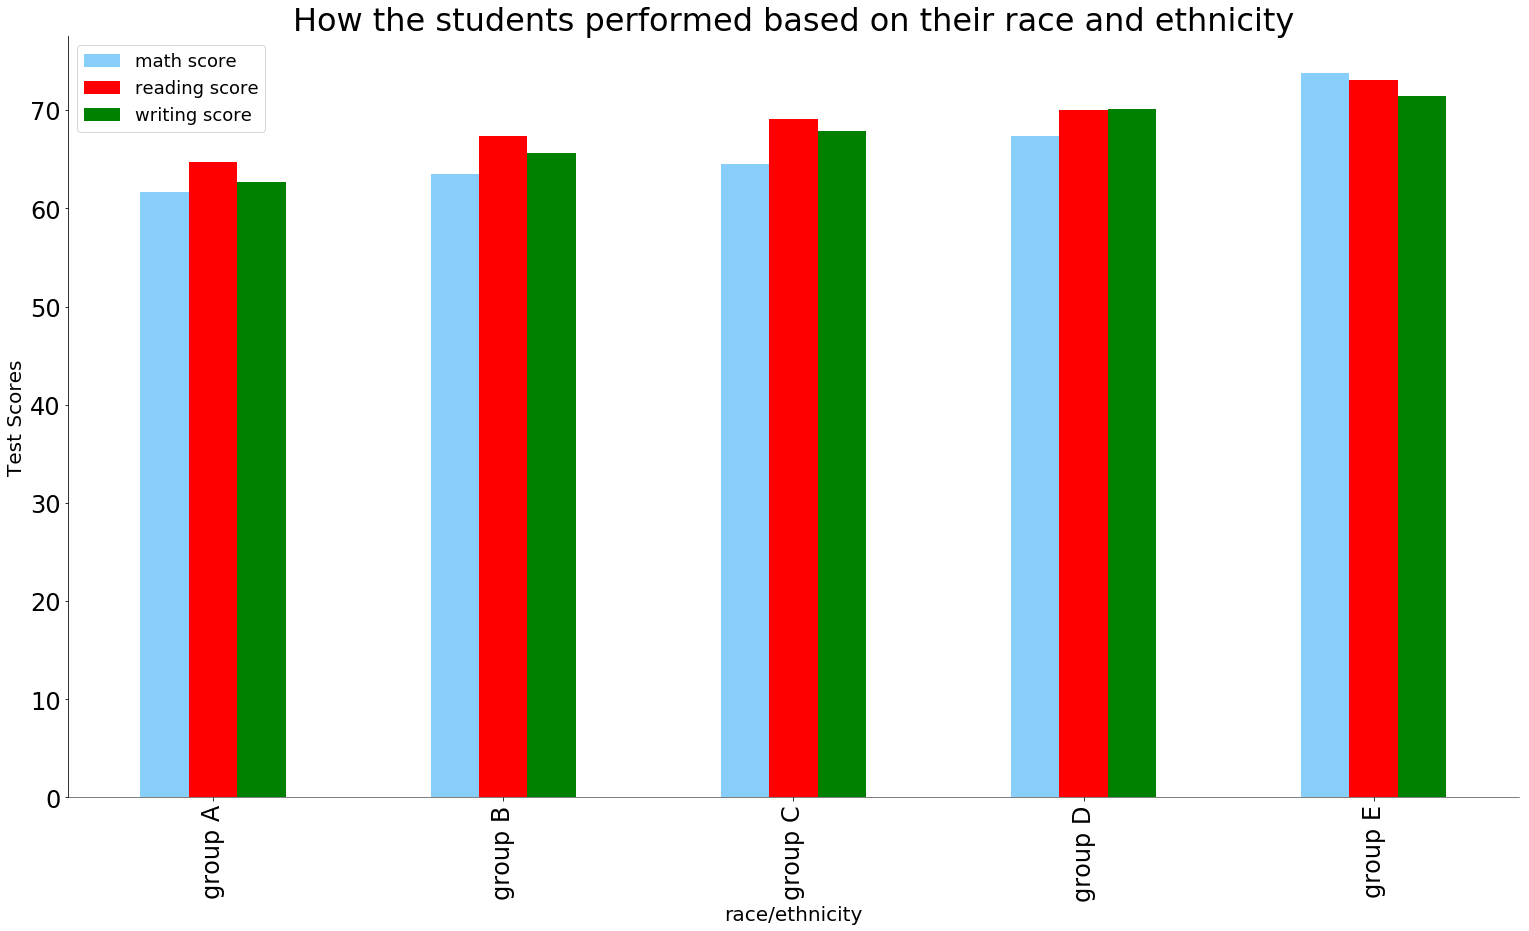

In [10]:
## A bar graph showing how each group performed
bar = df_student11.plot(kind='bar',figsize=(26, 14), color = ("lightskyblue", "red", "green"))
bar
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlabel("race/ethnicity", fontsize = 20)
plt.ylabel("Test Scores", fontsize = 20)
plt.title("How the students performed based on their race and ethnicity", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.legend(loc="upper left", fontsize=18)
plt.show()

In [11]:
df_student2 = df_student[['test preparation course', 'math score', 'reading score','writing score']]

In [12]:
df_student21 = df_student2['test preparation course'].value_counts().to_frame()
df_student21.rename(columns={'test preparation course': 'Frequency'}, inplace=True)
df_student21.index.name = "Test preparation course"
df_student21

,Frequency
Test preparation course,
none,642
completed,358


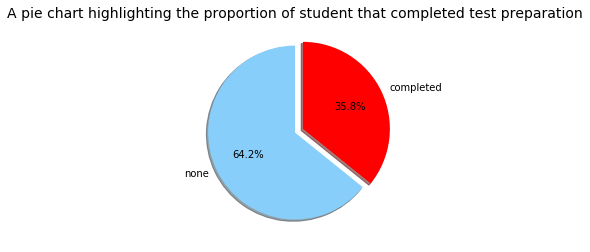

In [13]:
labels = df_student21.index
colors = ['lightskyblue', 'red']
explode =(0,0.1)
plt.pie(df_student21['Frequency'], explode = explode, labels= labels, colors=colors, startangle=90, autopct='%.1f%%', shadow = True)
plt.title("A pie chart highlighting the proportion of student that completed test preparation", fontsize = 14)
plt.show()

In [14]:
df_student22 = df_student2.groupby("test preparation course").mean()

In [15]:
df_student22

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


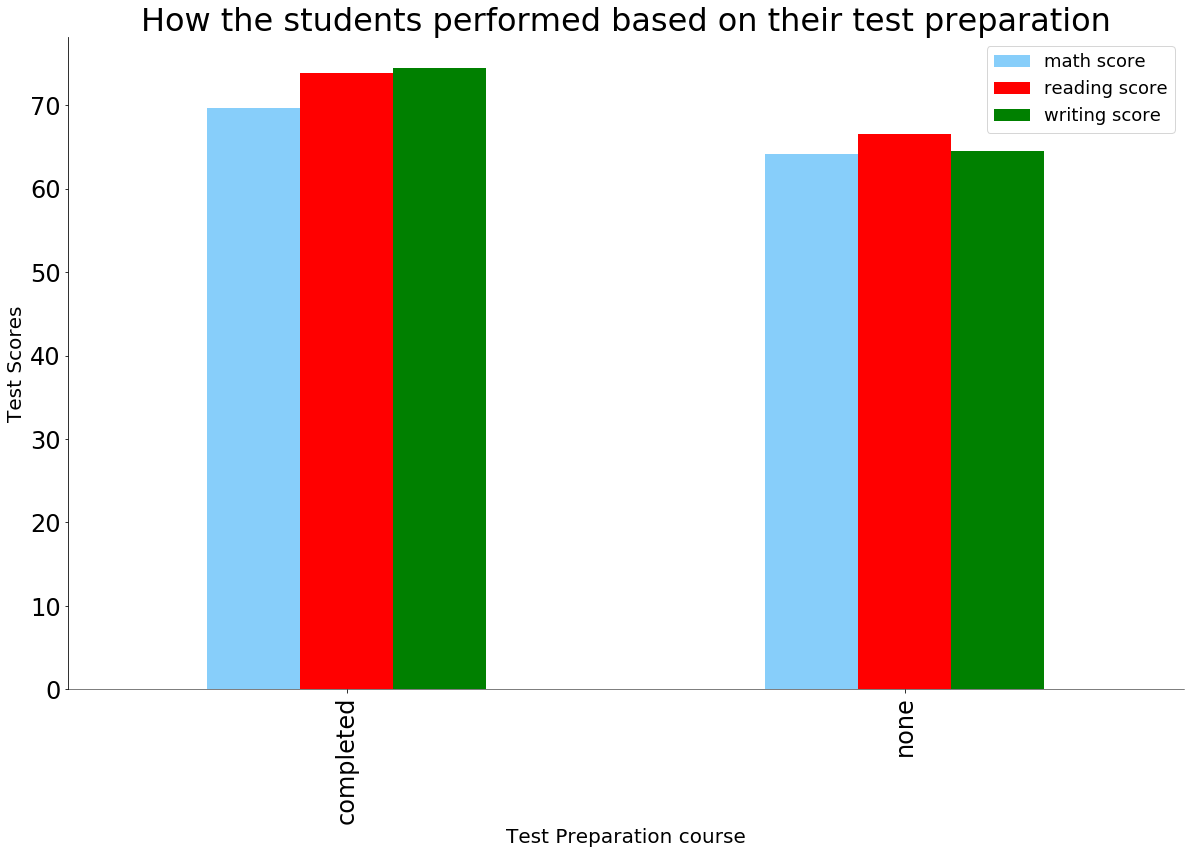

In [16]:
## A bar graph showing how test preparation affected performance
bar2 = df_student22.plot(kind='bar',figsize=(20, 12), color = ("lightskyblue", "red", "green"))
bar2
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlabel("Test Preparation course", fontsize = 20)
plt.ylabel("Test Scores", fontsize = 20)
plt.title("How the students performed based on their test preparation", fontsize=32)
bar2.spines['top'].set_visible(False)
bar2.spines['right'].set_visible(False)
bar2.spines['bottom'].set_linewidth(0.5)
bar2.spines['left'].set_visible(True)
plt.legend(loc="upper right", fontsize=18)
plt.show()

In [17]:
df_student3 = df_student[['parental level of education', 'math score', 'reading score','writing score']]

In [18]:
df_student31 = df_student3.groupby('parental level of education').mean()

In [19]:
df_student31

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


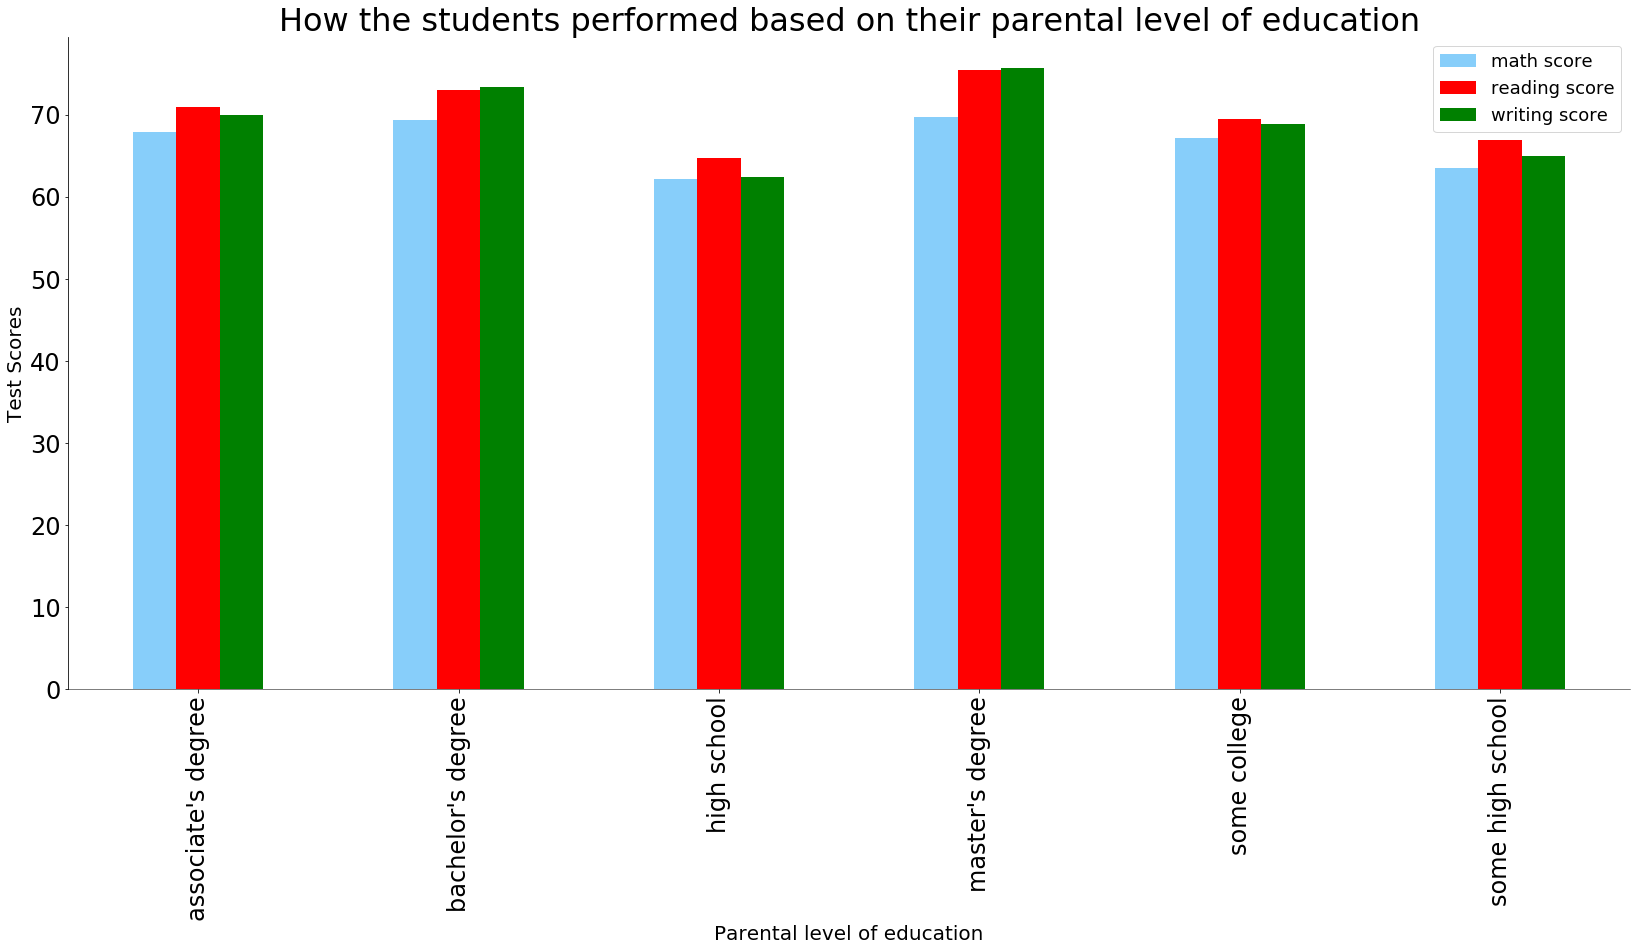

In [20]:
## A bar graph showing how parental level of education affected performance
bar3 = df_student31.plot(kind='bar',figsize=(28, 12), color = ("lightskyblue", "red", "green"))
bar3
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.xlabel("Parental level of education", fontsize = 20)
plt.ylabel("Test Scores", fontsize = 20)
plt.title("How the students performed based on their parental level of education", fontsize=32)
bar3.spines['top'].set_visible(False)
bar3.spines['right'].set_visible(False)
bar3.spines['bottom'].set_linewidth(0.5)
bar3.spines['left'].set_visible(True)
plt.legend(loc="upper right", fontsize=18)
plt.show()

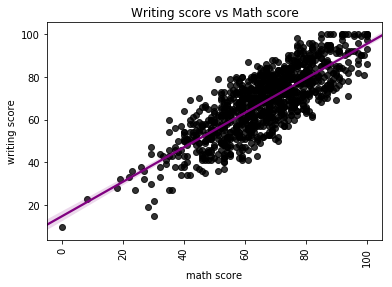

In [21]:
## A scatter plot showing writing vs reading score to show how correlated they are
sns.regplot('math score', 'writing score', data = df_student, marker = 'o', color = 'black', line_kws={'color': 'purple'}) 
plt.title("Writing score vs Math score")
plt.xticks(rotation = 90)
plt.show()

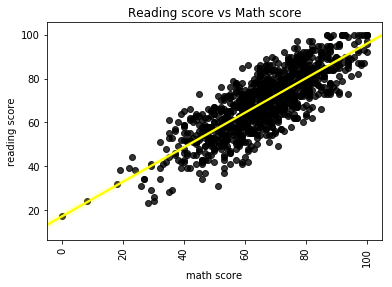

In [22]:
sns.regplot('math score','reading score', data = df_student, marker = 'o', color = 'black', line_kws={'color': 'yellow'}) 
plt.title("Reading score vs Math score")
plt.xticks(rotation = 90)
plt.show()

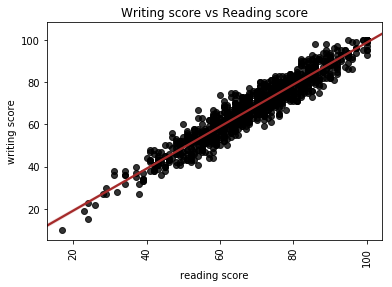

In [23]:
sns.regplot('reading score', 'writing score', data = df_student, marker = 'o', color = 'black', line_kws={'color': 'brown'}) 
plt.title("Writing score vs Reading score")
plt.xticks(rotation = 90)
plt.show()

In [24]:
df_student[['math score', 'writing score', 'reading score']].corr()

,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


## MODELLING THE DATASET

In [25]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-bb53dec8-ee26-4e95-ac80-38ed40dff552',
    'iam_service_endpoint': 'https://iam.ng.bluemix.net/oidc/token',
    'api_key': '9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g'
}

configuration_name = 'os_e62b6c1bb76c4710b1d1cc5aeab9a929_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_2 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('StudentsPerformance.csv', 'databel-donotdelete-pr-d4qsbyzwywn9lq'))
df_data_2.take(5)


[Row(gender='female', race/ethnicity='group B', parental level of education="bachelor's degree", lunch='standard', test preparation course='none', math score='72', reading score='72', writing score='74'),
 Row(gender='female', race/ethnicity='group C', parental level of education='some college', lunch='standard', test preparation course='completed', math score='69', reading score='90', writing score='88'),
 Row(gender='female', race/ethnicity='group B', parental level of education="master's degree", lunch='standard', test preparation course='none', math score='90', reading score='95', writing score='93'),
 Row(gender='male', race/ethnicity='group A', parental level of education="associate's degree", lunch='free/reduced', test preparation course='none', math score='47', reading score='57', writing score='44'),
 Row(gender='male', race/ethnicity='group C', parental level of education='some college', lunch='standard', test preparation course='none', math score='76', reading score='78', wr

In [26]:
from pyspark.ml.feature import VectorAssembler

In [27]:
from pyspark.ml.feature import Normalizer

In [28]:
from pyspark.ml.feature import StringIndexer

In [29]:
from pyspark.ml.regression import LinearRegression

In [30]:
df_student5 = df_data_2.select(df_data_2['math score'].cast("float"), df_data_2['reading score'].cast("float"), df_data_2['writing score'].cast("float"))
df_student6 = df_data_2.select(df_data_2['math score'].cast("float"), df_data_2['writing score'].cast("float"), df_data_2['reading score'].cast("float"))
df_student7 = df_data_2.select(df_data_2['reading score'].cast("float"), df_data_2['writing score'].cast("float"), df_data_2['math score'].cast("float"))

### PREDICTING THE WRITING SCORE USING MATH SCORE AND READING SCORE

In [31]:
vectorAssembler = VectorAssembler(inputCols = ['math score','reading score'], outputCol = 'features')

In [32]:
normalizer = Normalizer(inputCol = 'features', outputCol = 'features_norm', p = 1.0)

In [33]:
regression = LinearRegression(labelCol = "writing score", featuresCol = "features", maxIter = 10)
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, normalizer, regression])

In [34]:
model = pipeline.fit(df_student5)

In [35]:
prediction = model.transform(df_student5)
prediction.show()

+----------+-------------+-------------+-----------+--------------------+------------------+
|math score|reading score|writing score|   features|       features_norm|        prediction|
+----------+-------------+-------------+-----------+--------------------+------------------+
|      72.0|         72.0|         74.0|[72.0,72.0]|           [0.5,0.5]| 71.10182719454043|
|      69.0|         90.0|         88.0|[69.0,90.0]|[0.43396226415094...| 87.75954668898298|
|      90.0|         95.0|         93.0|[90.0,95.0]|[0.48648648648648...| 93.85051034539246|
|      47.0|         57.0|         44.0|[47.0,57.0]|[0.45192307692307...|  55.3766523500957|
|      76.0|         78.0|         75.0|[76.0,78.0]|[0.49350649350649...| 76.98962616524722|
|      71.0|         83.0|         78.0|[71.0,83.0]|[0.46103896103896...|  81.3374156310152|
|      88.0|         95.0|         92.0|[88.0,95.0]|[0.48087431693989...| 93.71642002303543|
|      40.0|         43.0|         39.0|[40.0,43.0]|[0.48192771084337.

In [36]:
from pyspark.ml.evaluation import RegressionEvaluator

In [37]:
regEval = RegressionEvaluator().setMetricName("r2") .setPredictionCol("prediction").setLabelCol("writing score")
regEval.evaluate(prediction) 

0.9127415011170789

### PREDICTING THE READING SCORE USING MATH SCORE AND WRITING SCORE

In [38]:
vectorAssembler2 = VectorAssembler(inputCols = ['math score','writing score'], outputCol = 'features')

In [39]:
normalizer2 = Normalizer(inputCol = 'features', outputCol = 'features_norm', p = 1.0)

In [40]:
regression2 = LinearRegression(labelCol = "reading score", featuresCol = "features", maxIter = 10)
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler2, normalizer2, regression2])

In [41]:
model2 = pipeline.fit(df_student6)

In [42]:
prediction2 = model2.transform(df_student6)
prediction2.show()

+----------+-------------+-------------+-----------+--------------------+------------------+
|math score|writing score|reading score|   features|       features_norm|        prediction|
+----------+-------------+-------------+-----------+--------------------+------------------+
|      72.0|         74.0|         72.0|[72.0,74.0]|[0.49315068493150...| 74.78235392784539|
|      69.0|         88.0|         90.0|[69.0,88.0]|[0.43949044585987...| 85.64661727358563|
|      90.0|         93.0|         95.0|[90.0,93.0]|[0.49180327868852...| 92.59590310107072|
|      47.0|         44.0|         57.0|[47.0,44.0]|[0.51648351648351...| 47.13141944987693|
|      76.0|         75.0|         78.0|[76.0,75.0]|[0.50331125827814...| 76.14439964683362|
|      71.0|         78.0|         83.0|[71.0,78.0]|[0.47651006711409...| 77.86656385055062|
|      88.0|         92.0|         95.0|[88.0,92.0]|[0.48888888888888...| 91.51197184717046|
|      40.0|         39.0|         43.0|[40.0,39.0]|[0.50632911392405.

In [43]:
from pyspark.ml.evaluation import RegressionEvaluator

In [44]:
regEval2 = RegressionEvaluator().setMetricName("r2") .setPredictionCol("prediction").setLabelCol("reading score")
regEval2.evaluate(prediction2) 

0.9186775763241611

### PREDICTING MATH SCORE USING READING SCORE AND WRITING SCORE

In [45]:
vectorAssembler3 = VectorAssembler(inputCols = ['reading score','writing score'], outputCol = 'features')

In [46]:
normalizer3 =  Normalizer(inputCol = 'features', outputCol = 'features_norm', p = 1.0)

In [47]:
regression3 = LinearRegression(labelCol = "math score", featuresCol = "features", maxIter = 10)
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler3, normalizer3, regression3])

In [48]:
model3 = pipeline.fit(df_student7)

In [49]:
prediction3 = model3.transform(df_student7)
prediction3.show()

+-------------+-------------+----------+-----------+--------------------+------------------+
|reading score|writing score|math score|   features|       features_norm|        prediction|
+-------------+-------------+----------+-----------+--------------------+------------------+
|         72.0|         74.0|      72.0|[72.0,74.0]|[0.49315068493150...| 69.27432639298434|
|         90.0|         88.0|      69.0|[90.0,88.0]|[0.50561797752808...| 83.58947675534424|
|         95.0|         93.0|      90.0|[95.0,93.0]|[0.50531914893617...| 87.84304524442993|
|         57.0|         44.0|      47.0|[57.0,44.0]|[0.56435643564356...|52.772260181919876|
|         78.0|         75.0|      76.0|[78.0,75.0]|[0.50980392156862...| 73.13148833195139|
|         83.0|         78.0|      71.0|[83.0,78.0]|[0.51552795031055...| 76.88620872186277|
|         95.0|         92.0|      88.0|[95.0,92.0]|[0.50802139037433...| 87.59362119484277|
|         43.0|         39.0|      40.0|[43.0,39.0]|[0.52439024390243.

In [50]:
from pyspark.ml.evaluation import RegressionEvaluator

In [51]:
regEval3 = RegressionEvaluator().setMetricName("r2") .setPredictionCol("prediction").setLabelCol("math score")
regEval3.evaluate(prediction3) 

0.6739811351956577